# 4. 자료 구조
## 문 13. 회문 찾기 - 큐와 스택
문자열이 회문(回文)인지 아닌지 판단하여 회문이면 True, 아니면 False를 결과로 알려 주는 알고리즘을 만들어 보세요.

- 회문: 순서대로 읽어도 거꾸로 읽어도 그 내용이 같은 낱말이나 문장

### 1. 큐와 스택
'자료를 넣는 동작'과 '자료를 빼는 동작'을 할 수 있고, 들어간 자료가 일렬로 보관된다는 공통점이 있다. 그러나 자료를 넣고 뺄 때 동작하는 방식이 다르다. 

#### 큐(queue)
'줄서기', 가장 먼저 들어간 자료를 가장 먼저 꺼낸다. First In First Out(FIFO)
- 인큐(enqueue): 큐에 자료를 한 개 집어넣는 동작  
- 디큐(dequeue): 큐 안에 있는 자료를 한 개 꺼내는 동작

#### 스택(stack)
'접시 쌓기'. 가장 마지막에 들어간 자료를 가장 먼저 꺼낸다. Last In First Out(LIFO)
- 푸시(push): 스택에 자료를 하나 집어넣는 동작
- 팝(pop): 스택 안에 있는 자료를 하나 꺼내는 동작

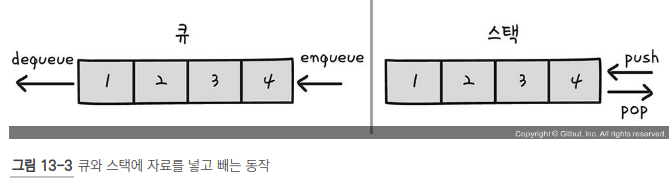

- 리스트로 큐와 스택 사용하기    
큐와 스택은 자료를 일렬로 보관하므로 파이썬의 리스트를 이용해 쉽게 만들 수 있다.
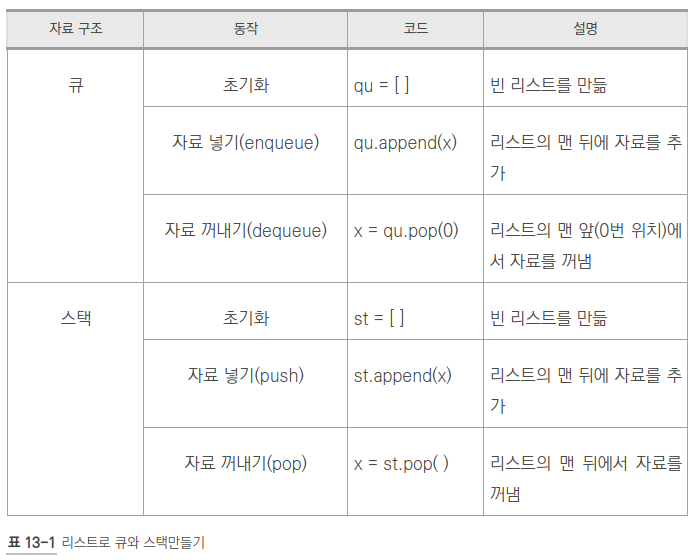

### 2. 회문 찾기 알고리즘
회문은 거꾸로 읽어도 같은 글자가 나와야 하므로 큐에서 꺼낸 문자들(원래 순서)이 스택에서 꺼낸 문자들(역순)이 같다면 그 문장은 회문이다. 

In [29]:
s = "hello"
s[0]

'h'

In [15]:
def palindrome(s):
    qu = []
    st = []
    
    for x in s:
        if x.isalpha():         # 해당 문자가 알파벳이면
            qu.append(x.lower())
            st.append(x.lower())
            
    while qu:        # 큐에 문자가 남아 있는 동안 반복
        if qu.pop(0) != st.pop():
            return False
    return True

In [16]:
print(palindrome("Wow"))

True


In [17]:
print(palindrome("Madam, I'm Adam."))

True


In [18]:
print(palindrome("Madam, I am Adam."))

False


- 연습문제 13-1    
큐와 스택을 이용하지 않고 회문인지 아닌지 판단할 수 있는 방법이 있습니다. 문장의 앞뒤를 차례로 비교하면서 각 문자가 같은지 확인하는 방법입니다. 이 방법으로 회문인지 아닌지 판단하는 알고리즘을 만들어 보세요.

In [30]:
# 문자열 앞뒤를 서로 비교하여 회문인지 확인
def palindrome(s):
    i = 0          # 문자열의 앞에서 비교할 위치
    j = len(s) - 1    # 문자열의 뒤에서 비교할 위치
    while i < j:        # 중간까지만 검사하면 됨
        if s[i].isalpha() == False:     # i 위치에 있는 문자가 알파벳 문자가 아니면 뒤로 이동
            i += 1
        elif s[j].isalpha() == False:
            j -= 1
        elif s[i].lower() != s[j].lower():   
            return False
        else:
            i += 1
            j -= 1
    return True

In [31]:
print(palindrome("Wow"))

True


In [32]:
print(palindrome("Madam, I'm Adam."))

True


In [33]:
print(palindrome("Madam, I am Adam."))

False


- 참고    

리스트로 큐와 스택의 동작을 구현하면 다른 모듈을 사용하지 않고 간단히 큐와 스택을 사용할 수 있다는 장점이 있다. 그러나 이 방법은 큐의 경우 비효율적이다. 

리스트로 만든 큐의 0번 위치에서 자료를 꺼내면(```qu.pop(0)```) 남은 자료를 전부 한 칸씩 당겨주는 처리가 필요하다. 따라서 비효율적이다.

효율성이 중요한 프로그램이라면 파이썬의 collections 모듈의 deque(double-ended queue)를 사용해 큐를 만들 수 있다. 

In [26]:
que = []
que.append(1)
que.append(2)
que.append(3)
que

[1, 2, 3]

In [27]:
que.pop(0)

1

In [28]:
que

[2, 3]

In [49]:
from collections import deque

qu = deque()

qu.append(1)
qu.append(2)
qu.append(3)

qu

deque([1, 2, 3])

In [22]:
qu.popleft()

1

In [50]:
qu.pop()

3

In [24]:
qu

deque([2, 3])

## 문 14. 동명이인 찾기 - 딕셔너리
n명의 사람 이름 중에 같은 이름을 찾아 집합으로 만들어 돌려주는 알고리즘을 만들어 보세요.

In [29]:
# 문 3 방식으로 동명이인 찾기 

def find_same_name(a):
    n = len(a)
    result = set()
    for i in range(0, n-1):
        for j in range(i+1, n):
            if a[i] == a[j]:
                result.add(a[i])
    return result

In [30]:
name = ["Tom", "Jerry", "Mike", "Tom"]
find_same_name(name)

{'Tom'}

In [32]:
name2 = ["Tom", "Jerry", "Mike", "Tom", "Mike"]
print(find_same_name(name2))

{'Tom', 'Mike'}


### 1. 딕셔너리 
파이썬의 딕셔너리는 정보를 찾는 기준이 되는 키(key)와 그 키에 연결된 값(value)의 대응 관계를 저장하는 자료 구조다. 

In [67]:
# 딕셔너리 만들기
d = dict()
len(d)

0

In [46]:
d = {"Justin": 13, "John": 10, "Mike": 9}
d["Justin"]

13

In [47]:
# 새로운 키에 새로운 값 추가 
d["summer"] = 8
d["summer"]

8

In [48]:
d

{'Justin': 13, 'John': 10, 'Mike': 9, 'summer': 8}

In [49]:
# 딕셔너리의 기존 키 덮어쓰기
d["summer"] = 2
d

{'Justin': 13, 'John': 10, 'Mike': 9, 'summer': 2}

In [50]:
# 빈 딕셔너리 만들기
d1 = {}

d2 = dict()

d2

{}

In [53]:
# 키에 해당하는 값 삭제하기
del d["John"]
d

{'Justin': 13, 'Mike': 9, 'summer': 2}

In [54]:
# 키가 딕셔너리 안에 있는지 확인
"Justin" in d

True

In [55]:
"John" not in d

True

In [56]:
# 딕셔너리에 담긴 모든 자료 지우기
d.clear()
d

{}

### 딕셔너리를 이용한 동명이인 찾기 알고리즘
 name_dict라는 딕셔너리를 만들고 이 중에서 값(value)이 2 이상인 키(key)를 골라내면 동명이인으로 구성된 집합을 쉽게 얻을 수 있습니다.

In [74]:
def find_same_name(a):
    name_dict = dict()
    
    for name in a:
        if name in name_dict:
            name_dict[name] += 1
        else:
            name_dict[name] = 1
   
    result = set() 
    
    for name in name_dict:
        if name_dict[name] >= 2:
            result.add(name)
    return result

In [75]:
name = ["Tom", "Jerry", "Mike", "Tom"]
print(find_same_name(name))

{'Tom'}


In [78]:
name2 = ["Tom", "Jerry", "Jerry", "Tom", "Mike"]
print(find_same_name(name2))

{'Tom', 'Jerry'}


### 알고리즘 분석
문3의 계산복잡도는 사람수가 n일 때 $O(n^2)$이다. 반면 딕셔너리로 동명이인을 찾는 알고리즘은 1) 리스트 정보를 한 번 읽어서 각 이름과 등장 횟수를 딕셔너리에 넣는 동작에서 n번 처리, 2) 딕셔너리 안에 저장된 서로 다른 이름을 확인해 등장 횟수가 2이상인 자료를 찾는 동작에서 n번 이하 처리이므로 O(n)이다. 

프로그램에서 for 반복문이 여러 번 나올 때는 서로 겹치느냐 겹치지 않느냐에 따라 계산 복잡도가 많이 달라진다. 
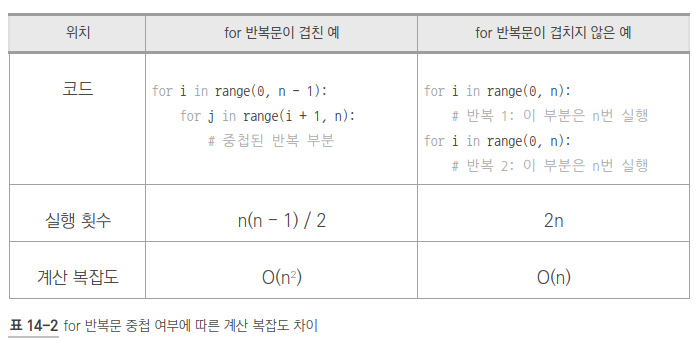

- 참고  

계산 복잡도 : 시간 복잡도와 공간 복잡도     
계산 복잡도에는 계산을 얼마나 빨리 할 수 있는지를 따져보는 '시간 복잡도'와 계산에 얼마나 많은 저장 공간이 필요한지 따져보는 '공간 복잡도'가 있다. 딕셔너리를 이용해 동명이인을 찾는 문제는 모든 사람을 서로 비교하는 방법보다 더 나은 시간 복잡도를 가진다. 그러나 딕셔너리를 만들어 그 안에 모든 이름과 등장 횟수를 저장해야 하므로 더 많은 저장 공간을 사용한다. -> 시간 복잡도와 공간 복잡도는 트레이드 오프 관계임. 따라서 알고리즘 분석을 정확하게 하려면 시간 복잡도뿐 아니라 공간복잡도도 함께 고려해야 한다. 

- 연습문제 4-1     

연습 문제 7-3에서 풀어 본 학생 번호로 학생 이름을 찾는 문제를 딕셔너리를 이용해 풀어 보세요.

다음과 같이 학생 번호와 이름이 주어졌을 때 학생 번호를 입력하면 그 학생 번호에 해당하는 이름을 돌려주고, 해당하는 학생 번호가 없으면 물음표를 돌려줘야 합니다.

39: Justin

14: John

67: Mike

105: Summer

In [40]:
def get_name(s_info, find_no): 
    if find_no in s_info:
        return s_info[find_no]
    return "?"

In [41]:
sample_info = {

    39: "Justin",

    14: "John",

    67: "Mike",

    105: "Summer"

}

In [42]:
print(get_name(sample_info, 105))

Summer


In [43]:
print(get_name(sample_info, 777))

?


- 해시 테이블    
파이썬의 딕셔너리와 같이 키와 값을 대응시켜 자료를 보관하는 자료 구조를 '해시 테이블(hash table)'이라고 부른다. C++에서는 unordered_map, 자바에서는 hashmap이라고 부른다. 그러나 파이썬이나 C#에서는 딕셔너리라고 부른다. 

## 문 15. 친구의 친구 찾기-그래프
친구 관계를 이용하여 어떤 한 사람이 직접 또는 간접으로 아는 모든 친구를 출력하는 알고리즘을 만들어 보세요.

### 2. 그래프
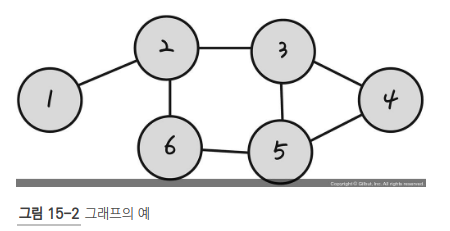

- 그래프: 꼭짓점(vertex) 여러 개와 각 꼭짓점 사이의 연결 관계를 선(edge)으로 표현한 것

### 4. 파이썬으로 그래프 표현하기
파이썬에서 그래프를 자료 구조로 만들어 저장하는 방법에는 여러 가지가 있다. 그러나 여기서는 알고 있는 리스트와 딕셔너리를 이용해 그래프를 표현하는 방법을 알아본다. 

1. 그래프를 표현할 딕셔너리를 만든다.      
2. 키에 각 꼭짓점의 정보를 저장한다.       
3. 각 꼭짓점에 직접 연결된 다른 꼭짓점들의 리스트를 만들어 키에 대응하는 값을 적어준다.

### 5. 모든 친구 찾기 알고리즘
Summer의 모든 친구 출력. 일단 Summer 자신을 출력한다. Summer의 3명의 친구의 이름을 출력한다. 세 명의 친구를 찾아 출력한다. 

1. 친구의 이름이 나올 때마다 메모지에 적었다가 한 명씩 처리하면서 메모지에서 지운다.  
2. 이미 처리 대상으로 올린 사람은 중복되지 않게 메모지에 적어두어야 한다. 

'앞으로 처리할 사람을 넣어 두었다가 하나씩 꺼내기 위한 기억 장로'로 큐를 이용하고, '이미 처리 대상으로 추가한 사람들을 적어둘 기억 장소'로 집합을 이용한다. 

In [20]:
# 입력 - g: 친구관계 그래프 start: 모든 친구를 찾을 자신
# 출력: 모든 친구의 이름
# 그래프 탐색 알고리즘

def print_all_friends(g, start):
    qu = []  # 앞으로 처리할 사람들
    done = set()  # 이미 큐에 추가한 사람들(중복 방지위해 집합에 기록)
    
    qu.append(start)  # 자신을 큐에 넣고 시작
    done.add(start)   # 자신을 집합에 넣고 시작
    
    while qu:   # 큐에 처리할 사람이 남아 있는 동안
        p = qu.pop(0)   # 큐에서 처리 대상을 한 명 꺼냄 
        print(p)    # 꼭짓점 이름을 출력
        
        for x in g[p]:              # 그의 친구 중에서
            if x not in done:   # 아직 큐에 추가된 적이 없는 사람이라면
                qu.append(x)   # 큐에 추가
                done.add(x) # 집합에 추가
                
                #print("qu", qu)
                #print("done", done)

In [21]:
fr_info = {
    'Summer': ['John', 'Justin', 'Mike'],
    'John': ['Summer', 'Justin'],
    'Justin': ['John', 'Summer', 'Mike', 'May'],
    'Mike': ['Summer', 'Justin'],
    'May': ['Justin', 'Kim'],
    'Kim': ['May'],
    'Tom': ['Jerry'],
    'Jerry': ['Tom']
}

print_all_friends(fr_info, 'Summer')
print()
print_all_friends(fr_info, 'Jerry')

Summer
John
Justin
Mike
May
Kim

Jerry
Tom


In [18]:
fr_info = {
    'Summer': ['John', 'Justin', 'Mike'],
    'John': ['Summer', 'Justin'],
    'Justin': ['John', 'Summer', 'Mike', 'May'],
    'Mike': ['Summer', 'Justin'],
    'May': ['Justin', 'Kim'],
    'Kim': ['May'],
    'Tom': ['Jerry'],
    'Jerry': ['Tom']
}

print_all_friends(fr_info, 'Summer')
print()
print_all_friends(fr_info, 'Jerry')

Summer
qu ['John']
done {'Summer', 'John'}
qu ['John', 'Justin']
done {'Justin', 'Summer', 'John'}
qu ['John', 'Justin', 'Mike']
done {'Justin', 'Summer', 'Mike', 'John'}
John
Justin
qu ['Mike', 'May']
done {'Justin', 'Summer', 'May', 'Mike', 'John'}
Mike
May
qu ['Kim']
done {'Justin', 'Summer', 'Kim', 'May', 'Mike', 'John'}
Kim

Jerry
qu ['Tom']
done {'Jerry', 'Tom'}
Tom


### 6. 친밀도 계산 알고리즘
A-B-C일 때 A-B의 친밀도는 1, B-C의 친밀도는 1이므로 A-C의 친밀도는 2이다. A와 X의 친밀도가 n이면 X의 친구 Y와 A의 친밀도는 n+1이다. 

In [22]:
def print_all_friends(g, start):
    qu = []
    done = set()
    
    qu.append((start, 0))  # (사람이름, 친밀도)를 튜플로 묶어 처리, 자기 자신과의 친밀도는 0
    done.add(start)
    
    while qu:
        (p, d) = qu.pop(0)
        print(p, d)
        
        for x in g[p]:
            if x not in done:
                qu.append((x, d+1)) # 친밀도 1 증가시켜 큐에 추가
                done.add(x)

In [23]:
fr_info = {
    'Summer': ['John', 'Justin', 'Mike'],
    'John': ['Summer', 'Justin'],
    'Justin': ['John', 'Summer', 'Mike', 'May'],
    'Mike': ['Summer', 'Justin'],
    'May': ['Justin', 'Kim'],
    'Kim': ['May'],
    'Tom': ['Jerry'],
    'Jerry': ['Tom']
}

print_all_friends(fr_info, 'Summer')
print()
print_all_friends(fr_info, 'Jerry')

Summer 0
John 1
Justin 1
Mike 1
May 2
Kim 3

Jerry 0
Tom 1


In [24]:
# 튜플
t = (3, 7)
t

(3, 7)

In [25]:
t[0]  # 튜플 t의 첫 번째 정보 값

3

In [26]:
t[1]     # 튜플 t의 두 번째 정보 값

7

In [27]:
(x, y) = t  # 튜플 t 안의 값들을 변수 x와 y에 각각 저장
x

3

- 연습 문제 15-1     

문제 15에서 배운 그래프 탐색 알고리즘을 이용하여 다음 그래프를 탐색하는 프로그램을 만들어 보세요(시작 꼭짓점: 1).

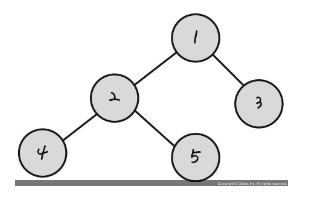

In [69]:
def bfs(g, start):
    qu = []   # 꼭지점을 큐에 저장
    done = set()  # 중복 방지를 위해 큐에 추가한 꼭짓점을 집합에 기록
    
    qu.append(start)
    done.add(start)
    
    while qu:
        p = qu.pop(0)
        print(p)
        
        for x in g[p]:
            if x not in done:
                qu.append(x)
                done.add(x)

In [70]:
g = {

    1: [2, 3],

    2: [1, 4, 5],

    3: [1],

    4: [2],

    5: [2]

}

 

bfs(g, 1)

1
2
3
4
5


- 너비 우선 탐색(BFS, Breadth First Search)    

너비를 우선해서 그래프를 탐색, 시작점인 루트 노드와 같은 거리에 있는 노드를 우선으로 방문한다. 이 알고리즘의 핵심은 __큐__ 를 이용하는 것. 노드에 방문하면서 인접한 노드 중 방문하지 않았던 노드의 정보만 큐에 넣어 먼저 큐에 들어있던 노드부터 방문한다. 

```.pop()```은 시작 복잡도가 O(N)이라 시간적으로 비효율적이므로 collections 라이브러리의 deque를 사용하면 시간을 절약할 수 있다. 

In [44]:
graph_list = {1: set([3, 4]),
              2: set([3, 4, 5]),
              3: set([1, 5]),
              4: set([1]),
              5: set([2, 6]),
              6: set([3, 5])}
root_node = 1

In [59]:
from collections import deque

def BFS_with_adj_list(graph, root):
    visited = []
    queue = deque([root])
    
    while queue:
        n = queue.popleft()
        print("n", n)
        if n not in visited:
            visited.append(n)
            print("visited", visited)
            print("graph[n]", graph[n])
            queue += graph[n] - set(visited)
            print(queue)
    return visited

In [60]:
print(BFS_with_adj_list(graph_list, root_node))

n 1
visited [1]
graph[n] {3, 4}
deque([3, 4])
n 3
visited [1, 3]
graph[n] {1, 5}
deque([4, 5])
n 4
visited [1, 3, 4]
graph[n] {1}
deque([5])
n 5
visited [1, 3, 4, 5]
graph[n] {2, 6}
deque([2, 6])
n 2
visited [1, 3, 4, 5, 2]
graph[n] {3, 4, 5}
deque([6])
n 6
visited [1, 3, 4, 5, 2, 6]
graph[n] {3, 5}
deque([])
[1, 3, 4, 5, 2, 6]


In [47]:
print(BFS_with_adj_list(graph_list, root_node))

[1, 3, 4, 5, 2, 6]


- 깊이 우선 탐색(DFS, Depth First Search)   

갈 수 있는 한 끝까지 탐색해 리프 노드를 방문하고 이전 갈림길에서 선택하지 않았던 노드를 방문하면서 탐색한다. __스택__ 을 사용하면 쉽게 구현 가능하다. 먼저 방문한 노드에 연결된 노드보다 현재 방문한 노드에 연결된 노드를 방문해야 한 방향으로 갈 수 있다. 


- 참고: [BFS, DFS](https://cyc1am3n.github.io/2019/04/26/bfs_dfs_with_python.html)

In [61]:
def DFS_with_adj_list(graph, root):
    visited = []
    stack = [root]
    
    while stack:
        n = stack.pop()
        if n not in visited:
            visited.append(n)
            stack += graph[n] - set(visited)
            
    return visited

In [62]:
print(DFS_with_adj_list(graph_list, root_node))

[1, 4, 3, 5, 6, 2]


15-2 연습 문제 15-1에서 만든 프로그램이 그래프를 탐색해 가는 과정을 단계별로 적어 보세요.

In [28]:
y

7

In [66]:
# 집합 만들기
s = set()
len(s)

0

In [57]:
# 집합에 자료 추가
s = {1, 2, 3}
s.add(4)
s

{1, 2, 3, 4}

In [58]:
# 집합에서 자료 삭제
s.discard(3)
s

{1, 2, 4}

In [59]:
2 in s

True

In [60]:
3 not in s

True

In [61]:
# 길이 확인 
len(s)

3

In [63]:
# 집합의 모든 자료 지우기
s.clear()
s

set()